In [1]:
#%matplotlib inline

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

## PART 1: Iris database visualization

First load the copy of the Iris dataset shipped with scikit-learn.
Iris Fisher Database : https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
from sklearn.datasets import load_iris

# Reading the Iris.csv file
iris = load_iris()

# Print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# Print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# Print the iris data (top 11 records)
print(iris.data[0:12])

# Print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

# Examples in each class 
print("Number of samples in each class: %s" % np.bincount(iris.target))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Number of samples in each class: [50 50 50]


# <font color='red'>Question 1
Q1.Identify the attributes, classes, and number of samples per class

In [4]:
# Create a DataFrame of the iris dataset
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head(150)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# Extract Attributes / Features
X = iris.data

# Extract Target / Class Labels
y = iris.target

#Some statistics on the data
data.describe()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


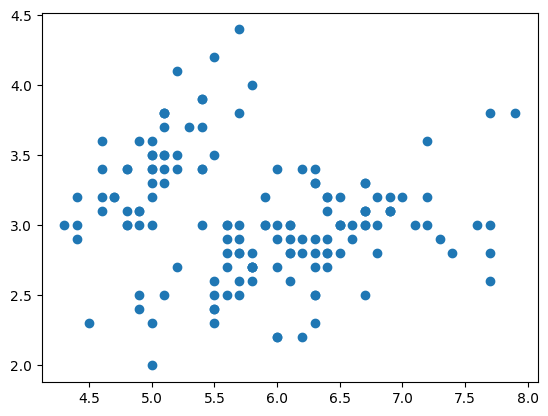

In [6]:
# Visualize the dataset features

plt.scatter(data['sepal length'],data['sepal width'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

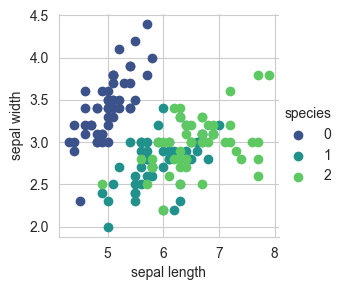

In [7]:
#(0:setosa, 1:versicolor, 2:virginica)

sns.set_style('whitegrid')
sns.FacetGrid(data, hue='species', palette="viridis")\
   .map(plt.scatter,'sepal length','sepal width')\
   .add_legend()
plt.show


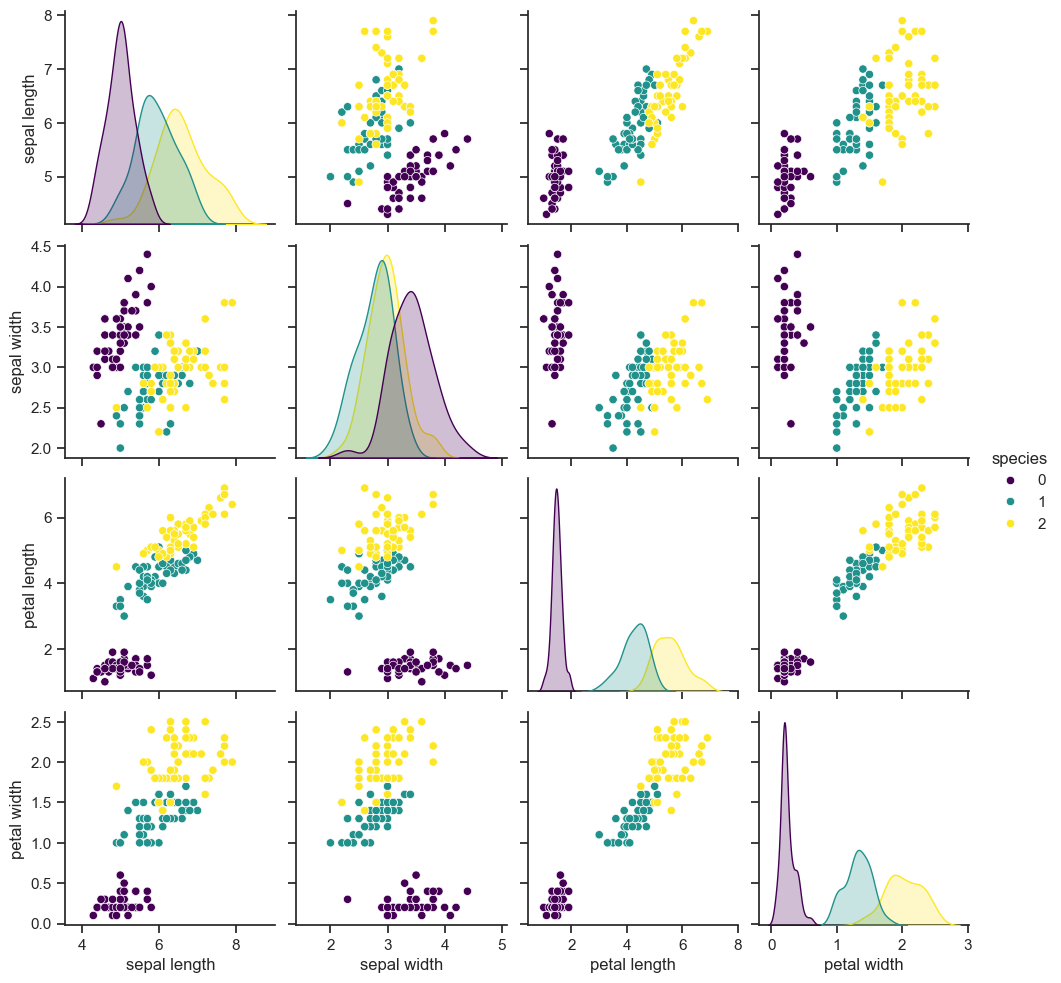

In [8]:
# Plot all pairs
sns.set(style="ticks", color_codes=False)
g=sns.pairplot(data, hue='species', palette="viridis")

# <font color='red'>Questions 2 -3
Q2 : By looking to the scatter plots, what do you observe ?
    
Q3 : Which attribute would you use for the first split?

# PART 2: Classification with Decision Trees

## II.1 : Apply Decision Trees for classification with hyperparameters by default

[Ellipsis]

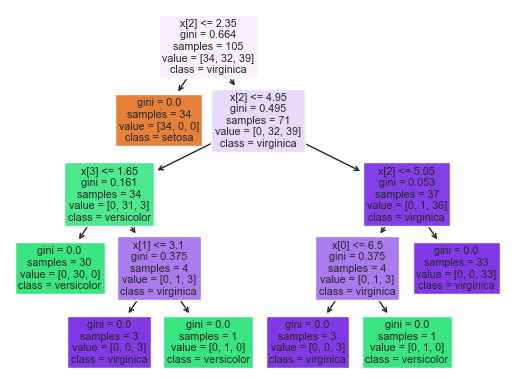

In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Creating Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0) # 70% training and 30% test

# Creating Decision Tree Classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#Visualize the tree after training
tree.plot_tree(clf, class_names=iris.target_names, filled=True)
[...]

# <font color='red'> Questions 4-5 
    
Q4: Can you interpret the results obtained at the first depth?
    
Q5: What can you infer on the quality of the tree?

## II.2. After constructing the tree, the model can be used for prediction

In [10]:
from sklearn.metrics import accuracy_score

# Predict Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))


Train data accuracy: 1.0
Test data accuracy: 0.9777777777777777


In [11]:

# Classification of three new data 

species_idx1 = clf.predict([[5, 3, 1.4, 0.2]])[0]
print("Species 1:", iris.target_names[species_idx1])

species_idx2 = clf.predict([[3, 5, 4, 2]])[0]
print("Species 2:", iris.target_names[species_idx2])

species_idx3 = clf.predict([[6, 2, 0.4, 1.2]])[0]
print("Species 3:", iris.target_names[species_idx3])

species_idx4 = clf.predict([[6, 2, 0.4, 3]])[0]
print("Species 4:", iris.target_names[species_idx4])

Species 1: setosa
Species 2: versicolor
Species 3: setosa
Species 4: setosa


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# <font color='red'>Question 6: 
Q6 : For the three examples above, describe the classification process through the different depths of the tree.

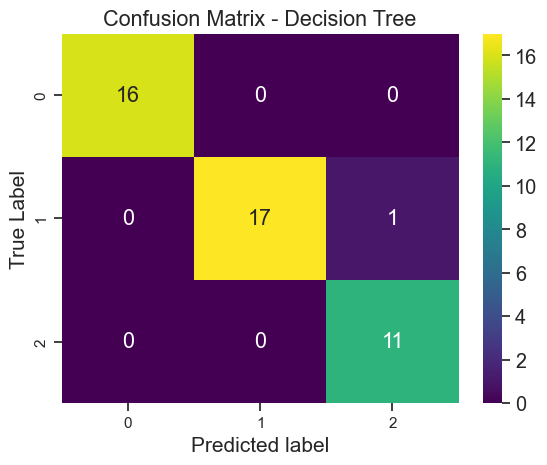

<Figure size 200x200 with 0 Axes>

In [12]:
from sklearn import metrics
# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            y_pred)#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(2,2))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="viridis")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)

plt.show()

# <font color='red'> Question 7: 
Q7 : Interpret this confusion matrix 



## II.2. Apply Decision Trees for classification by fixing the hyperparameters 

# <font color='red'>Questions 8-9: 
Q8 : In the following, configure the hyperparameters of the tree (max_depth, min_samples_split, and criterion) and analyze their impact. 

Q9: Also, analyze the impact of using in the training set 80%, 70%, 50% and 20% of the dataset.


[Ellipsis]

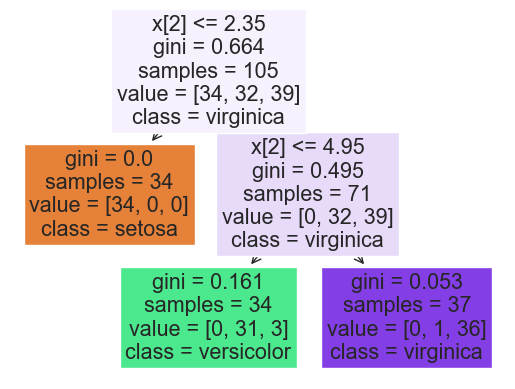

In [13]:
# Before constructing the model, separate the dataset into train and test
from sklearn.model_selection import train_test_split

# You can change the size of the training dataset 80%, 70%, 50%, 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0) # 70% training and 30% test

# Creating Decision Tree Classifier by specifying some parametrs
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=30, min_samples_leaf=20)
#clf = tree.DecisionTreeClassifier(min_samples_split = 20, criterion="gini")
#clf = tree.DecisionTreeClassifier(criterion="log_loss", max_depth=3)
#clf = tree.DecisionTreeClassifier(max_leaf_nodes=5,max_depth = 5, min_samples_leaf = 20, criterion="gini", min_samples_split = 20)
clf.fit(X_train, y_train)

# Visualize the tree after training
tree.plot_tree(clf, class_names=iris.target_names, filled=True)
[...]

In [14]:
from sklearn.metrics import accuracy_score

# Predict Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.9619047619047619
Test data accuracy: 0.9111111111111111
